https://cs231n.github.io/convolutional-networks/

https://www.youtube.com/watch?v=zfiSAzpy9NM

### some notes from cs213n

mnist dataset img size: 28x28 (784)

CIFAR-10: 32x32x3 (3072)

**full connectivity for img data is wasteful and huge number of parameters would quickly lead to overfitting**

**structure for a cnn**:

- convolutional layer

- pooling layer

- fully connected

e.g. a simple convnet for CIFAR-10

    [INPUT   -  CONV    -   RELU   -   POOL -   FC]
    
    32x32x3   32x32x12    32x32x12   16x16x12  1x1x10

### CIFAR-10 implementation

https://www.youtube.com/watch?v=7HPwo4wnJeA

60000 32x32

loss='categorical_crossentropy' <- for one hot y-label e.g. y=[0,1,0,0,0]
 
loss='sparse_categorical_crossentropy' <- for single value y-label e.g. y=2

In [507]:
import tensorflow as tf
import keras
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD,Adam,Adagrad,RMSprop
plt.rcParams['font.size']='14'

(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)
#normalizing
x_train=x_train/255.0
x_test=x_test/255.0

In [508]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000,), (10000,))

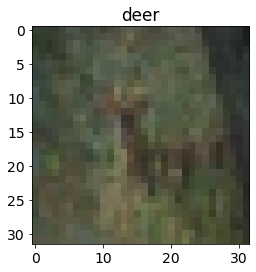

In [48]:
classes=['airplane',
         'automobile',
         'bird',
         'cat',
         'deer',
         'dog',
         'frog',
         'horse',
         'ship',
         'truck']

def plot_sample(X,y,idx):
    
    plt.imshow(X[idx])
    plt.title(classes[y[idx]])
    
plot_sample(x_train,y_train,0)
plot_sample(x_train,y_train,10)

Epoch 1/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.8854 - accuracy: 0.3200
Epoch 2/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.6688 - accuracy: 0.4011
Epoch 3/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.5782 - accuracy: 0.4346
Epoch 4/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.5089 - accuracy: 0.4582
Epoch 5/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.4550 - accuracy: 0.4789
Epoch 6/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.4089 - accuracy: 0.4933
Epoch 7/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.3589 - accuracy: 0.5135
Epoch 8/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.3175 - accuracy: 0.5278
Epoch 9/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.2802 - accuracy: 0.5408
Epoch 10/10
1563/1563 [==============================] - 26s 17m

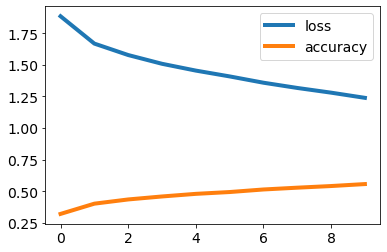

In [56]:
model=Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(3000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(10,activation='sigmoid'))
model.compile(optimizer=SGD(lr=0.1),
              loss='sparse_categorical_crossentropy',#one number
              metrics=['accuracy'])

traj=model.fit(x_train,
               y_train,
               batch_size=32,
               epochs=10)

plt.plot(traj.history['loss'],linewidth=4,label='loss')
plt.plot(traj.history['accuracy'],linewidth=4,label='accuracy')
plt.legend()

In [34]:
Flatten(input_shape=(32,32,3))

In [41]:
nn=models.Sequential([layers.Flatten(input_shape=(32,32,3)),
                      layers.Dense(3000,activation='relu'),
                      layers.Dense(1000,activation='relu'),
                      layers.Dense(10,activation='softmax')])

nn.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

nn.fit(x_train,y_train,epochs=5,batch_size=32)

Epoch 1/5
1563/1563 [==============================] - 28s 18ms/step - loss: 2.3027 - accuracy: 0.0983
Epoch 2/5
1563/1563 [==============================] - 27s 17ms/step - loss: 2.3027 - accuracy: 0.0969
Epoch 3/5
1563/1563 [==============================] - 27s 17ms/step - loss: 2.3027 - accuracy: 0.0973
Epoch 4/5
1563/1563 [==============================] - 27s 17ms/step - loss: 2.3027 - accuracy: 0.0992
Epoch 5/5
1563/1563 [==============================] - 26s 17ms/step - loss: 2.3027 - accuracy: 0.0976


In [58]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred=model.predict(x_test)

y_pred_label=[np.argmax(y) for y in y_pred]

print('Classification Report: \n', classification_report(y_test,y_pred_label))

Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.54      0.56      1000
           1       0.69      0.54      0.61      1000
           2       0.45      0.23      0.30      1000
           3       0.28      0.40      0.33      1000
           4       0.34      0.50      0.41      1000
           5       0.47      0.27      0.34      1000
           6       0.36      0.75      0.49      1000
           7       0.66      0.41      0.51      1000
           8       0.74      0.52      0.61      1000
           9       0.59      0.57      0.58      1000

    accuracy                           0.47     10000
   macro avg       0.52      0.47      0.47     10000
weighted avg       0.52      0.47      0.47     10000



Epoch 1/100
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4841 - accuracy: 0.4638
Epoch 2/100
1563/1563 [==============================] - 12s 7ms/step - loss: 1.1160 - accuracy: 0.6090
Epoch 3/100
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9896 - accuracy: 0.6551
Epoch 4/100
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9030 - accuracy: 0.6875
Epoch 5/100
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8364 - accuracy: 0.7096
Epoch 6/100
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7838 - accuracy: 0.7299
Epoch 7/100
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7361 - accuracy: 0.7452
Epoch 8/100
1563/1563 [==============================] - 12s 7ms/step - loss: 0.6974 - accuracy: 0.7594
Epoch 9/100
1563/1563 [==============================] - 12s 7ms/step - loss: 0.6571 - accuracy: 0.7727
Epoch 10/100
1563/1563 [==============================] - 12s 7m

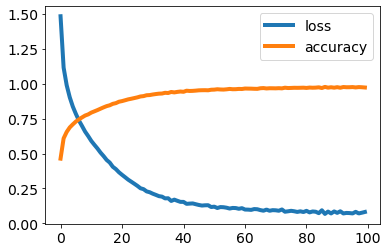

In [74]:
cnn=models.Sequential([layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
                       layers.MaxPooling2D((2,2)),
                       layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                       layers.MaxPooling2D((2,2)),
                       layers.Flatten(),
                       layers.Dense(64,activation='relu'),
                       layers.Dense(10,activation='softmax')])

cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

traj2=cnn.fit(x_train,y_train,epochs=100,batch_size=32)
plt.plot(traj2.history['loss'],linewidth=4,label='loss')
plt.plot(traj2.history['accuracy'],linewidth=4,label='accuracy')
plt.legend()

In [61]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9410 - accuracy: 0.6962


[0.9410116076469421, 0.6962000131607056]

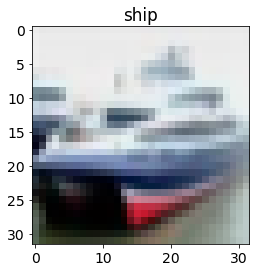

In [62]:
plot_sample(x_test,y_test,1)

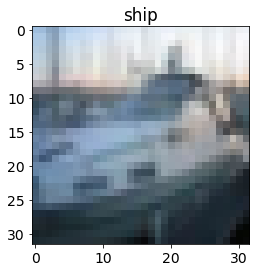

In [63]:
plot_sample(x_test,y_test,2)

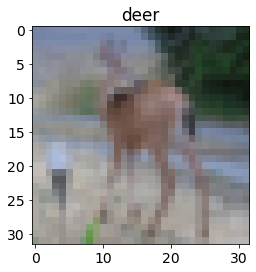

In [64]:
plot_sample(x_test,y_test,100)

In [70]:
y_pred=cnn.predict(x_test)
np.argmax(y_pred[:5],axis=1)

array([3, 1, 8, 0, 6])

In [68]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [72]:
[classes[i] for i in y_test[:5]]

['cat', 'ship', 'ship', 'airplane', 'frog']

In [73]:
[classes[i] for i in np.argmax(y_pred[:5],axis=1)]

['cat', 'automobile', 'ship', 'airplane', 'frog']

In [76]:
cnn.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_21 (Flatten)        (None, 2304)              0         
                                                                 
 dense_60 (Dense)            (None, 64)              

### sizing

#### conv layer

W - input width (H is the same)

F - filter size

P - padding size

S - number of strides

**output size: (W-F+2P)/S+1, (H-F+2P)/S+1**

**#weights = F^2 x #input channel x #filters**

e.g. input 7x7, filter 3x3, stride 1, padding 0

output size = (7-3+0)/1+1 = 5x5

if stride 2:

output size = (7-3+0)/2+1 = 3x3

#### pooling layer

F - filter size

S - strides

**output size: (W-F)/S+1, (H-F)/S+1**

e.g. CIFAR-10

    layer1 conv:

    32x32x3 -> [3x3x32] -- (32-3+0)/1+1=30 --> 30x30x32  

    input      conv filter   (W-F+2P)/S+1       output
    
    #weights = 3x3x3x32 = 864
    #bias = 32
    #total = 864+32 = 896
    
    layer2 pooling: 
    
    30x30x32 -> [2x2] -- (30-2)/2+1=15 --> 15x15x32   note: layers.MaxPooling2D((2,2)) F=2, S=2
    
    input       pooling   (W-F)/S+1         output
    
    layer3 conv:
    
    15x15x32 -> [3x3x64] -- (15-3)/1+1=13 --> 13x13x64
    
    input       conv filter  (W-F+2P)/S+1      output
    
    #weights = 3x3x32x64 = 18432
    #bias = 64
    #total = 18496
    
    layer4 pooling:
    
    13x13x64 -> [2x2] -- (13-2)/2+1=6 --> 6x6x64
    
    layer5 flattern -> dense 64
    
    6x6x64 -> 2304 -> [64] -----> 64
    
    input    flatten  64 nodes  output
    
    #weights and $bias = 2304*64 + 64 = 147520 
    
    64 ->   [10]   --> 10
    
    input  10 nodes   output
    
    #weights and #bias = 64*10 +10 = 650


In [86]:
2304*64+64


147520

In [81]:
cnn2=models.Sequential([layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
                        layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
                        layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                        layers.MaxPooling2D((2,2)),
                        layers.Flatten(),
                        layers.Dense(64,activation='relu'),
                        layers.Dense(10,activation='softmax')])

cnn2.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_24 (Flatten)        (None, 2304)              0         
                                                                 
 dense_66 (Dense)            (None, 64)              

In [82]:
cnn2=models.Sequential([layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
                        layers.MaxPooling2D(pool_size=(2,2)),
                        layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                        layers.MaxPooling2D((2,2)),
                        layers.Flatten(),
                        layers.Dense(64,activation='relu'),
                        layers.Dense(10,activation='softmax')])

cnn2.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_25 (Flatten)        (None, 2304)              0         
                                                                 
 dense_68 (Dense)            (None, 64)              

In [87]:
for layer in cnn.layers:
    
    print(layer)

In [93]:
f0, b0=cnn.layers[0].get_weights()

f0.shape, b0.shape

((3, 3, 3, 32), (32,))

In [94]:
f2, b2=cnn.layers[2].get_weights()
f2.shape, b2.shape

((3, 3, 32, 64), (64,))

In [97]:
f0.max(),f0.min()

(0.88535595, -1.0063008)

In [98]:
f2.max(),f2.min()

(1.7326959, -3.2491722)

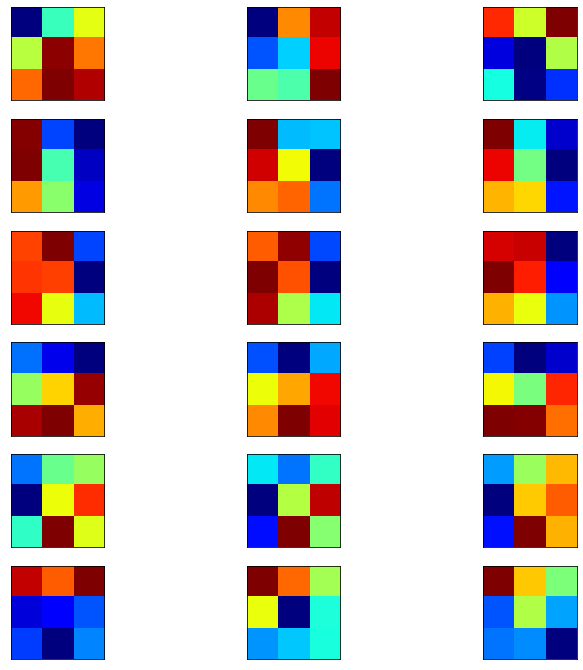

In [101]:
#plot first 6 filters
idx=1
plt.figure(figsize=(12,12))
for i in range(6):
    
    f=f0[:,:,:,i]
    
    for j in range(3):#3 channels
        
        plt.subplot(6,3,idx)
        plt.imshow(f[:,:,j],cmap='jet')
        plt.xticks([])
        plt.yticks([])
        idx+=1

In [107]:
from keras import Model

l0=Model(inputs=cnn.inputs,outputs=cnn.layers[0].output)

l0.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6_input (InputLayer)  [(None, 32, 32, 3)]      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [157]:
x_test.shape,x_test[0,:,:,:].shape

l0=Model(inputs=cnn.inputs,outputs=cnn.layers[0].output)

l0.summary()

Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6_input (InputLayer)  [(None, 32, 32, 3)]      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [192]:
def get_layer_model(layer=1):

    outputs = [cnn.layers[i].output for i in range(layer)]
    l = Model(inputs=cnn.inputs, outputs=outputs)
    l.summary()
    
    return l

def first_layer_feature_map(x,layer=1):
    
    l=get_layer_model(layer=layer)
    if layer==1:
        lout=l.predict(np.expand_dims(x,axis=0))
    elif layer==2:
        lout=l.predict(np.expand_dims(x,axis=0))
        lout=lout[-1]
    
    plt.figure(figsize=(16,8))
    for i in range(32):

        plt.subplot(4,8,i+1)
        plt.imshow(lout[0,:,:,i],cmap='jet')
        plt.xticks([])
        plt.yticks([])
        
def second_cnn_layer_feature_map(x,layer=3):
    
    l3=get_layer_model(layer=3)
    lout=l3.predict(np.expand_dims(x_test[0,:,:,:],axis=0))
    lout=lout[-1]
    plt.figure(figsize=(16,16))
    for i in range(64):

        plt.subplot(8,8,i+1)
        plt.imshow(lout[0,:,:,i],cmap='jet')
        plt.xticks([])
        plt.yticks([])

In [198]:
l5=get_layer_model(layer=5)
lout=l5.predict(np.expand_dims(x_test[0,:,:,:],axis=0))

lout[-1].shape

Model: "model_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6_input (InputLayer)  [(None, 32, 32, 3)]      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_21 (Flatten)        (None, 2304)              0  

(1, 2304)

Model: "model_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6_input (InputLayer)  [(None, 32, 32, 3)]      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________


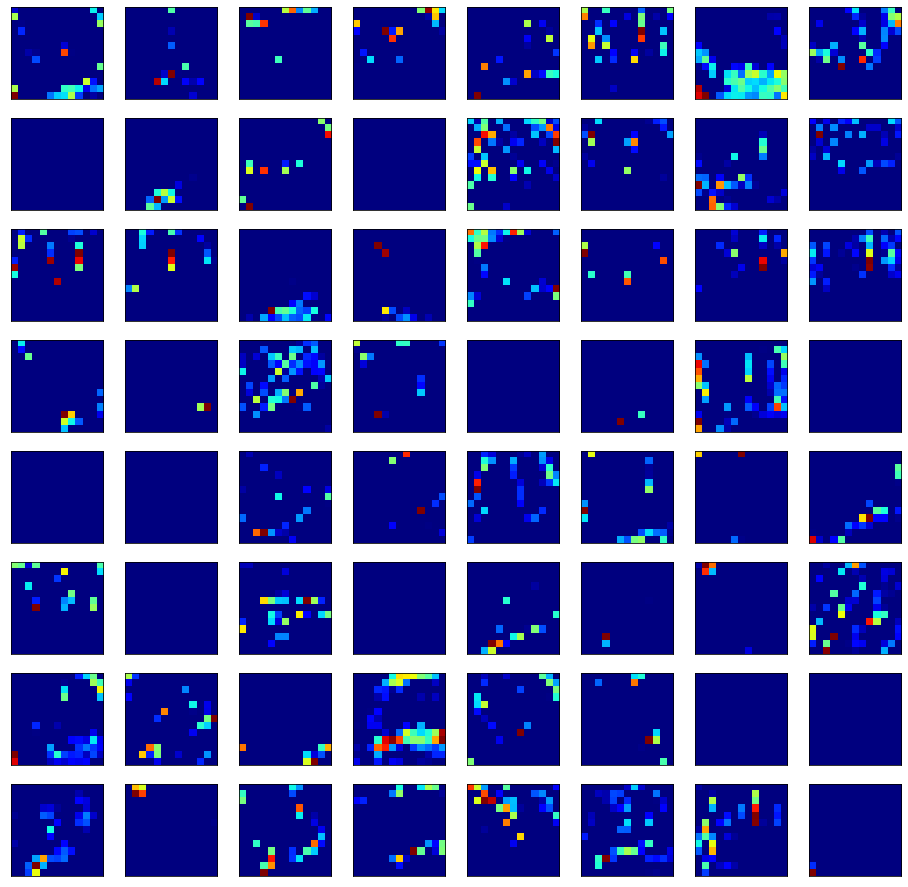

In [197]:
second_cnn_layer_feature_map(x_test[0,:,:,:],layer=4)

In [195]:
l4=get_layer_model(layer=4)
lout=l4.predict(np.expand_dims(x_test[0,:,:,:],axis=0))

lout[-1].shape

Model: "model_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6_input (InputLayer)  [(None, 32, 32, 3)]      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
Total params: 19,392
Trainable params: 19,392
Non-trainabl

(1, 6, 6, 64)

Model: "model_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6_input (InputLayer)  [(None, 32, 32, 3)]      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________


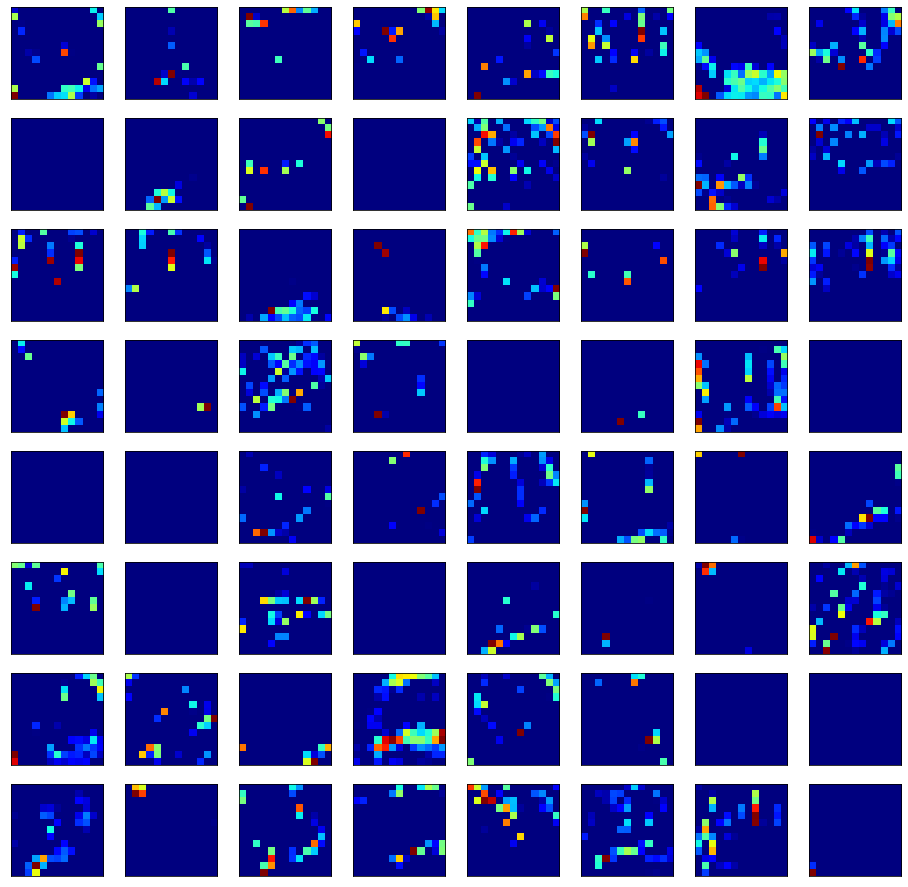

In [193]:
second_cnn_layer_feature_map(x_test[0,:,:,:],layer=3)

In [186]:
l3=get_layer_model(layer=3)
lout00,lout0,lout=l3.predict(np.expand_dims(x_test[0,:,:,:],axis=0))

lout.shape

Model: "model_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6_input (InputLayer)  [(None, 32, 32, 3)]      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________


(1, 13, 13, 64)

In [171]:
l2=get_layer_model(layer=2)

Model: "model_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6_input (InputLayer)  [(None, 32, 32, 3)]      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [176]:
lout=l2.predict(np.expand_dims(x_test[0,:,:,:],axis=0))
lout[0].shape,lout[1].shape

((1, 30, 30, 32), (1, 15, 15, 32))

In [178]:
l1=get_layer_model(layer=1)
lout1=l1.predict(np.expand_dims(x_test[0,:,:,:],axis=0))
lout1.shape

Model: "model_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6_input (InputLayer)  [(None, 32, 32, 3)]      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


(1, 30, 30, 32)

Model: "model_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6_input (InputLayer)  [(None, 32, 32, 3)]      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
Model: "model_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6_input (InputLayer)  [(None, 32, 32, 3)]      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 1

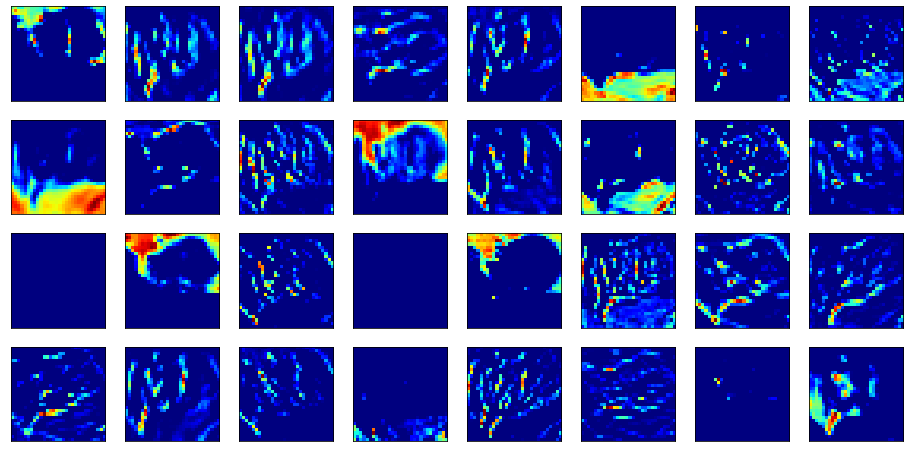

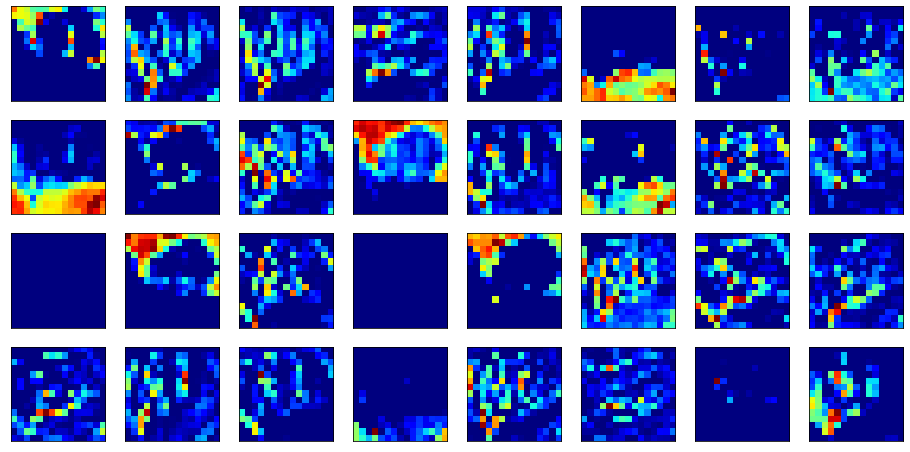

In [190]:
first_layer_feature_map(x_test[0,:,:,:],layer=1)
first_layer_feature_map(x_test[0,:,:,:],layer=2)

Model: "model_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6_input (InputLayer)  [(None, 32, 32, 3)]      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


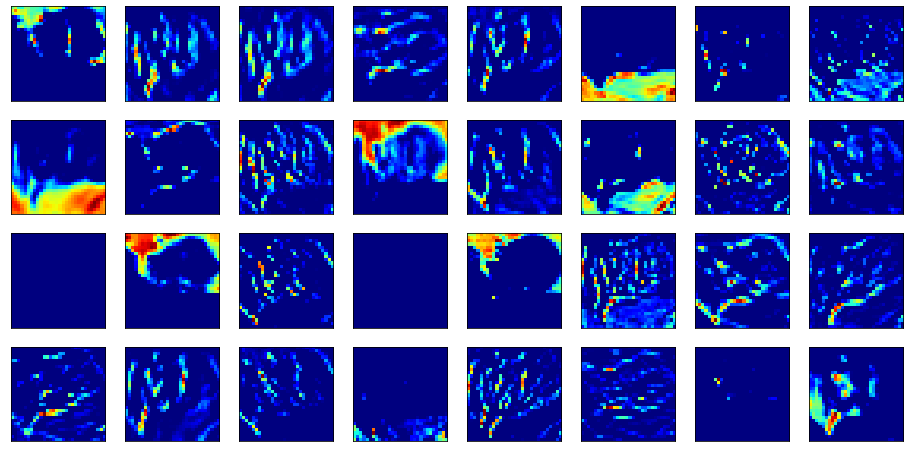

In [170]:
    
first_layer_feature_map(x_test[0,:,:,:],layer=1)

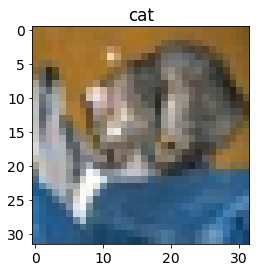

In [131]:
plot_sample(x_test,y_test,0)

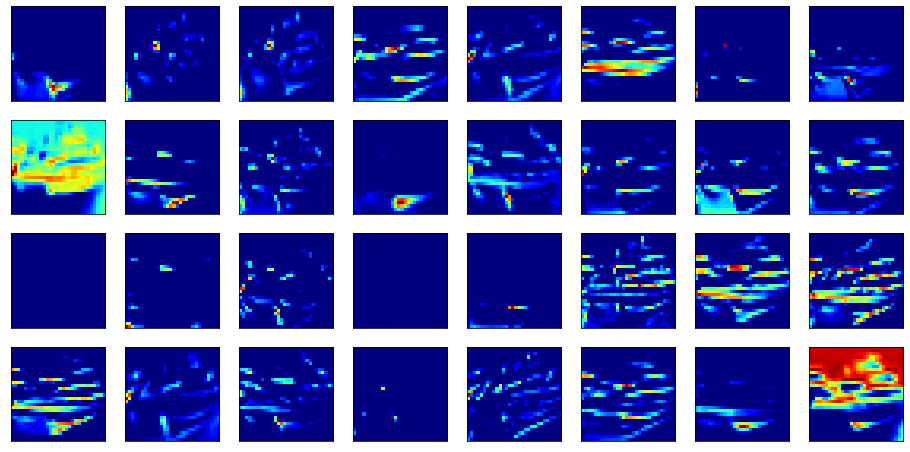

In [136]:
first_layer_feature_map(x_test[1,:,:,:])

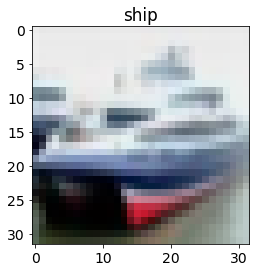

In [137]:
plot_sample(x_test,y_test,1)

In [168]:
l2=get_layer_model(layer=2)


Model: "model_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6_input (InputLayer)  [(None, 32, 32, 3)]      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


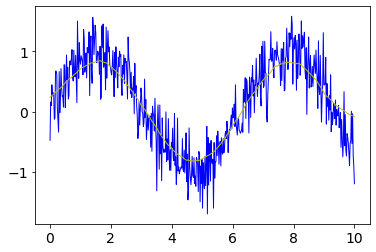

In [205]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 500)
y1 = np.sin(x) # まずは元の信号を
y2 = y1 + np.random.randn(500)*0.3 # ノイズを混ぜる

v = np.ones(100)/100.0 # 移動平均をとるための配列vを設定。今回は前後５つの値を用いて平均をとる。
y3 = np.convolve(y2, v, mode='same')  # グラフを描く都合上'same'で。

#plt.plot(x, y1,'r',linewidth=3)
plt.plot(x, y2,'b', linewidth=1)
plt.plot(x, y3, 'y',linewidth=1)


In [206]:
v = np.ones(100)/100.0
v

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01])

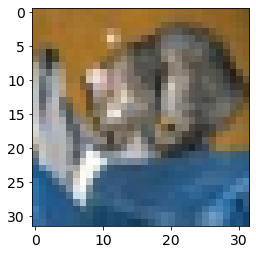

In [208]:
plt.imshow(x_test[0,:,:,:])

In [211]:
temp=x_test[0,:,:,0]

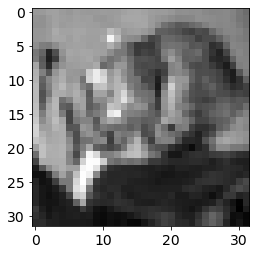

In [213]:
plt.imshow(temp,cmap='gray')

In [214]:
temp.shape

(32, 32)

In [215]:
temp[:,0]

array([0.61960784, 0.59607843, 0.59215686, 0.60784314, 0.60784314,
       0.58039216, 0.49803922, 0.51372549, 0.66666667, 0.70588235,
       0.71764706, 0.7372549 , 0.74117647, 0.74117647, 0.76078431,
       0.77254902, 0.79607843, 0.83921569, 0.83137255, 0.78039216,
       0.64705882, 0.45882353, 0.30980392, 0.16078431, 0.11372549,
       0.18823529, 0.20392157, 0.19607843, 0.19607843, 0.26666667,
       0.23921569, 0.21176471])

In [217]:
out=np.zeros((32,32))
out[:,0]=temp[:,0]
for i in range(31):
    
    out[:,i+1]=temp[:,i+1]-temp[:,i]

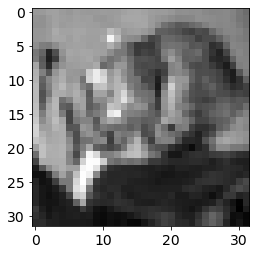

In [219]:
plt.imshow(temp,cmap='gray')

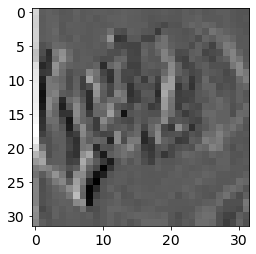

In [220]:
plt.imshow(out,cmap='gray')

(168, 300)

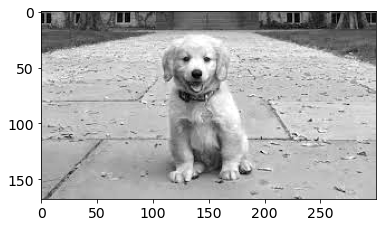

In [228]:
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
dog = image.imread('dog.jpeg')

#print(dog.dtype)
#print(dog.shape)
#print(type(dog))
# display the array of pixels as an image
#plt.imshow(dog)

plt.imshow(dog[:,:,0],cmap='gray')
dog[:,:,0].shape

In [229]:
temp=dog[:,:,0]
out=np.zeros((168,300))
out[:,0]=temp[:,0]
for i in range(299):
    
    out[:,i+1]=temp[:,i+1]-temp[:,i]

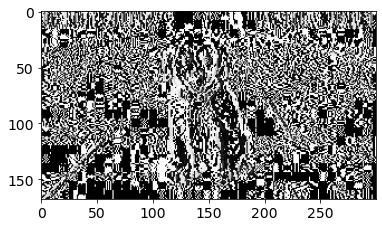

In [231]:
plt.imshow(out,cmap='gray')

In [254]:
def f(x):
    A=.5
    x0=0.7
    if -x0<x<x0:
        return A
    else:
        return 0

def g(x):
    A=0.3
    x0=0.7
    if -x0<x<x0:
        return A 
    else:
        return 0 

def convo(x):
    fog=0
    xt=-3
    dx=0.01
    while xt<3:
        fog=fog+f(xt)*g(x-xt)*dx
        xt=xt+dx
    return fog

#g*f = int_0^t f(x)g(t-x)dx
t=-2
dt=0.005

#while t<2:
#    ff.plot(t,f(t))
#    fg.plot(t,g(t))
#    fc.plot(t,convo(t))
#    t=t+dt

In [259]:
x=np.linspace(-2,2,num=100)
fx=[f(ele) for ele in x]
gx=[g(ele) for ele in x]
covx=[convo(ele) for ele in x]

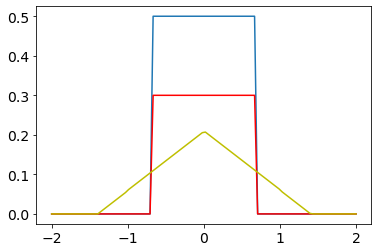

In [260]:
plt.plot(x,fx)
plt.plot(x,gx,'r')
plt.plot(x,covx,'y')

In [271]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
#from utils import round_expr, symdisp, symplot, genConvGIF

# temp workaround
import warnings
from matplotlib import MatplotlibDeprecationWarning
warnings.filterwarnings('ignore', category=MatplotlibDeprecationWarning)

plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams['legend.fontsize'] = 13
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid'] = False

In [262]:
!pip install sympy

     |████████████████████████████████| 6.4 MB 3.4 MB/s            
     |████████████████████████████████| 532 kB 536 kB/s            


In [266]:
from IPython.core.display import HTML
from IPython.display import Image
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

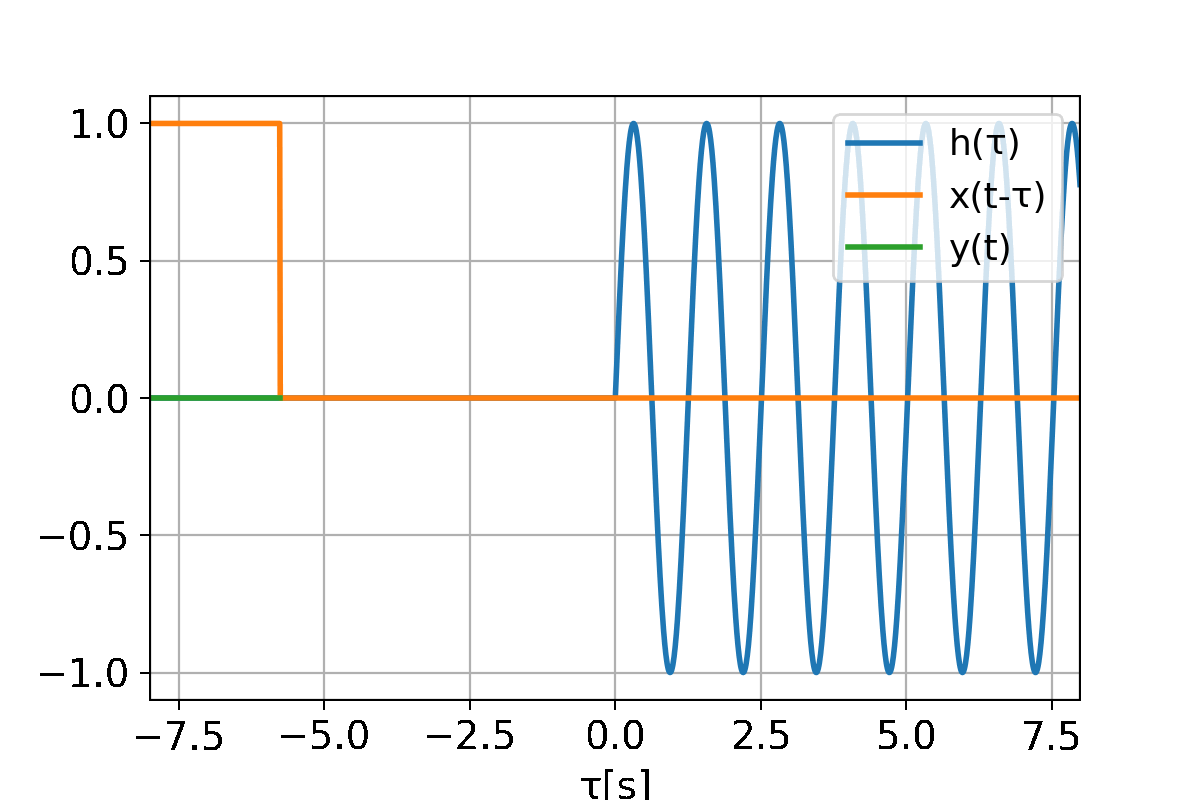

In [298]:
t = sp.symbols('t', real=True)
x = sp.Piecewise((0, t<0), 
                  (1, (t>=0)&(t<2)), 
                  (1, (t>=2)))

X = Normal('x', 0, 1)
#h = sp.Piecewise((0, t<0),                   
#                 (5*sp.exp(-t)*sp.sin(5*t), (t>=0)))

h = sp.Piecewise((0, t<0),                   
                 (sp.sin(5*t), (t>=0)))

ti = -6  # animation starts at this time
tf = 8   # animation ends at this time
τ_max = 8

delay = np.arange(-τ_max, τ_max, 0.01) # must be symmetric w.r.t 0

figName  = 'convolutionFig1.gif'

genConvGIF(x, h, t, delay, ti, tf,\
           figName, xlabel= 'τ[s]', ylabel=['h(τ)', 'x(t-τ)','y(t)'],\
           fram=50, inter=150, plotConv=True)

Image('convolutionFig1.gif', width=500)

In [270]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Math, display
from sympy import lambdify

def genGIF(x, y, figName, xlabel=[], ylabel=[], fram=200, inter=20):
    '''
    Create and save a plot animation as GIF

    :param x: x-axis values [np array]
    :param y: y-axis values [np array]
    :param figName: figure file name w/ folder path [string]
    :param xlabel: xlabel [string]
    :param ylabel: ylabel [string]
    :param fram: number of frames [int]
    :param inter: time interval between frames [milliseconds]

    '''
    figAnin = plt.figure()
    ax      = plt.axes(xlim=(np.min(x), np.max(x)),\
                       ylim=(np.min(y)-0.1*np.max(np.abs(y)), np.max(y)+0.1*np.max(np.abs(y))))
    line,   = ax.plot([], [])
    ax.grid()

    indx = np.arange(0, len(x), int(len(x)/fram))

    if len(xlabel):
           plt.xlabel(xlabel)

    if len(ylabel):
           plt.ylabel(ylabel)

    def init():
        line.set_data([], [])
        return line,

    def animate(i):
        line.set_data(x[0:indx[i]], y[0:indx[i]])
        return line,

    anim = FuncAnimation(figAnin, animate, init_func=init, frames=fram, interval=inter, blit=True)

    anim.save(figName, dpi=200, writer='imagemagick')
    plt.close()

# função para arredondamento de floats em expressões simbólicas
def round_expr(expr, numDig):
    '''
    Rounds numerical values in sympy expressions

    :param expr: sympy symbolic expression
    :param numDig: number of rounding decimals

    :return: rounded expression
    '''
    return expr.xreplace({n : round(n, numDig) for n in expr.atoms(sp.Number)})

# função para print de expressões simbólicas
def symdisp(expr, var, unit=' '):
    '''
    Latex style display of sympy expressions

    :param expr: expression in latex [string]
    :param var: sympy variable, function, expression.
    :param unit: string indicating unit of var [string]
    '''
    display(Math(expr+sp.latex(var)+'\;'+unit))

# Função para plot de funções do sympy
def symplot(t, F, interval, funLabel, yLabel=''):
    '''
    Create plots of sympy symbolic functions

    :param t: sympy variable
    :param F: sympy function F(t)
    :param interval: array of values of t where F should be evaluated [np.array]
    :param funLabel: curve label be displayed in the plot [string]
    :param yLabel: scale of the plot
    '''
    fig = plt.figure()
    if type(F) == list:
        indLabel = 0
        for f in F:
            func  = lambdify(t, f, modules=['numpy', {'Heaviside': lambda t:np.heaviside(t,0)}])
            f_num = func(interval)

            plt.plot(interval, f_num, label=funLabel[indLabel])
            plt.legend();
            plt.xlim([min(interval), max(interval)]);
            plt.xlabel('tempo [s]');
            plt.ylabel(yLabel)
            indLabel += 1
    else:
        func  = lambdify(t, F, modules=['numpy', {'Heaviside': lambda t:np.heaviside(t,0)}])
        f_num = func(interval)

        plt.plot(interval, f_num, label=funLabel)
        plt.legend(loc="upper right");
        plt.xlim([min(interval), max(interval)]);
        plt.xlabel('tempo [s]');
        plt.ylabel(yLabel)

    plt.grid();
    plt.close();
    return fig


def genConvGIF(x, h, t, totalTime, ti, tf, figName, xlabel=[], ylabel=[], fram=200, inter=20, plotConv=False):
    '''
    Create and save a convolution plot animation as GIF

    :param x: x(t) function [sympy expr]
    :param h: h(t) function [sympy expr]
    :param t: t time variable [sympy variable]
    :param totalTime: array of time instants where the functions will be evaluated [nparray]
    :param ti: time when animation starts [scalar]
    :param tf: time when animation stops [scalar]
    :param figName: figure file name w/ folder path [string]
    :param xlabel: xlabel [string]
    :param ylabel: ylabel [string]
    :param fram: number of frames [int]
    :param inter: time interval between frames [milliseconds]

    '''
    x_func = lambdify(t, x, modules=['numpy', {'Heaviside': lambda t:np.heaviside(t,0)}])
    h_func = lambdify(t, h, modules=['numpy', {'Heaviside': lambda t:np.heaviside(t,0)}])

    x_num  = x_func(totalTime)
    h_num  = h_func(totalTime)
    dt = totalTime[1]-totalTime[0]

    if plotConv:
        y_num  = np.convolve(h_num, x_num, 'same')*dt
        ymax = np.max([x_num, h_num, y_num])
        ymin = np.min([x_num, h_num, y_num])
    else:
        ymax = np.max([x_num, h_num])
        ymin = np.min([x_num, h_num])

    figAnim = plt.figure()
    ax      = plt.axes(xlim=(totalTime.min(), totalTime.max()),ylim=(ymin-0.1*np.abs(ymax), ymax+0.1*np.abs(ymax)))
    line1, line2, line3 = ax.plot([], [], [], [], [], [])
    line1.set_label(ylabel[0])
    line2.set_label(ylabel[1])

    if plotConv:
        line3.set_label(ylabel[2])

    ax.grid()
    ax.legend(loc="upper right");

    # plot static function
    figh = symplot(t, h, totalTime, 'h(t)')

    if len(xlabel):
           plt.xlabel(xlabel)

    def init():
        line1.set_data(figh.get_axes()[0].lines[0].get_data())
        return line1,

    plt.close(figh)

    delays = totalTime[::int(len(totalTime)/fram)]
    ind    = np.arange(0, len(totalTime), int(len(totalTime)/fram))

    ind    = ind[delays > ti]
    delays = delays[delays > ti]

    ind    = ind[delays < tf]
    delays = delays[delays < tf]

    totalFrames = len(delays)

    def animate(i):
        figx = symplot(t, x.subs({t:delays[i]-t}), totalTime, 'x(t-τ)')
        line2.set_data(figx.get_axes()[0].lines[0].get_data())

        if plotConv:
            line3.set_data(totalTime[0:ind[i]], y_num[0:ind[i]])

        plt.close(figx)
        return line2, line3

    anim = FuncAnimation(figAnim, animate, init_func=init, frames=totalFrames, interval=inter, blit=True)

    anim.save(figName, dpi=200, writer='imagemagick')
    plt.close()


In [296]:
from sympy.stats import Normal, density, E, std, cdf, skewness, sample

X = Normal('x', 0, 1)

type(sample(X,size=1))

numpy.ndarray

https://dspillustrations.com/pages/posts/misc/convolution-examples-and-the-convolution-integral.html

https://stackoverflow.com/questions/56095788/convolution-integral-export-as-animation

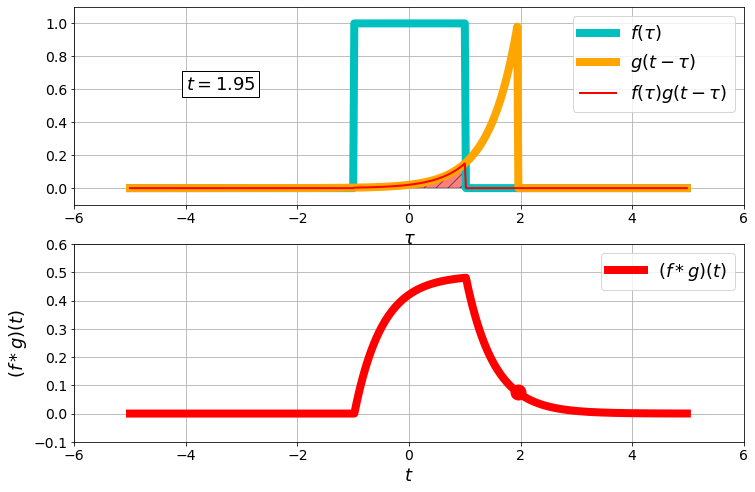

In [521]:
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def showConvolution(t0,f1, f2):
    # Calculate the overall convolution result using Simpson integration
    convolution = np.zeros(len(t))
    for n, t_ in enumerate(t):
        prod = lambda tau: f1(tau) * f2(t_-tau)
        convolution[n] = scipy.integrate.simps(prod(t), t)

    # Create the shifted and flipped function
    f_shift = lambda t: f2(t0-t)
    prod = lambda tau: f1(tau) * f2(t0-tau)

    # Plot the curves
    plt.gcf().clear() # il
    #plt.figure(figsize=(8,4))
    plt.subplot(211)
    plt.gca().set_ymargin(0.05) # il
    plt.plot(t, f1(t), 'c',label=r'$f(\tau)$',linewidth=8)
    plt.plot(t, f_shift(t), 'orange',label=r'$g(t-\tau)$',linewidth=8)
    plt.fill(t, prod(t), color='r', alpha=0.5, edgecolor='black', hatch='//') # il
    plt.plot(t, prod(t), 'r-', label=r'$f(\tau)g(t-\tau)$')
    plt.grid(True); plt.xlabel(r'$\tau$',fontsize=18) #plt.ylabel(r'$x(\tau)$') # il
    plt.legend(fontsize=18) # il
    plt.ylim([-0.1,1.1])
    plt.xlim([-6,6])
    plt.text(-4, 0.6, '$t=%.2f$' % t0, bbox=dict(fc='white'),fontsize=18) # il

    # plot the convolution curve
    plt.subplot(212)
    plt.gca().set_ymargin(0.05) # il
    plt.plot(t, convolution, 'r',label='$(f*g)(t)$',linewidth=8)

    # recalculate the value of the convolution integral at the current time-shift t0
    current_value = scipy.integrate.simps(prod(t), t)
    plt.plot(t0, current_value, 'ro',markersize=15)  # plot the point
    plt.grid(True); plt.xlabel('$t$',fontsize=18); plt.ylabel('$(f*g)(t)$',fontsize=18) # il
    plt.ylim([-0.1,0.6])
    plt.xlim([-6,6])
    plt.legend(fontsize=18) # il
    #plt.show() # il

Fs = 50  # our sampling frequency for the plotting
T = 5    # the time range we are interested in
t = np.arange(-T, T, 1/Fs)  # the time samples
#f1 = lambda t: np.maximum(0, 1-abs(t))
f1 = lambda t: (abs(t)<1)
#f1 = lambda t: np.sin(t)
f2 = lambda t: (t>0) * np.exp(-2*t)


#f1 = lambda t: np.sin(t)
#f2 = lambda t: (abs(t)<0.5)

t0 = np.arange(-2.0,2.0, 0.05)

fig = plt.figure(figsize=(12,8))
anim = animation.FuncAnimation(fig, showConvolution, frames=t0, fargs=(f1,f2),interval=80)

anim.save('animation2.gif', writer='imagemagick', fps=30,dpi=100)


#plt.show()

In [522]:
Image(url='animation2.gif')

In [308]:
np.heaviside([-1.5, 0, 2.0], 0.5)

array([0. , 0.5, 1. ])

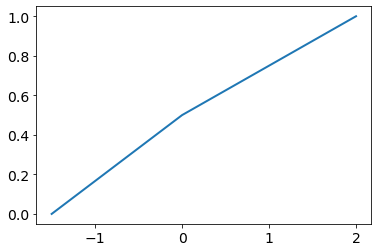

In [309]:
plt.plot([-1.5, 0, 2.0],np.heaviside([-1.5, 0, 2.0], 0.5))

In [316]:
np.sin(t)+np.random.rand(1)

array([ 1.92204593e+00,  1.92752702e+00,  1.93262235e+00,  1.93732990e+00,
        1.94164778e+00,  1.94557427e+00,  1.94910778e+00,  1.95224691e+00,
        1.95499041e+00,  1.95733717e+00,  1.95928626e+00,  1.96083690e+00,
        1.96198846e+00,  1.96274049e+00,  1.96309269e+00,  1.96304491e+00,
        1.96259718e+00,  1.96174966e+00,  1.96050272e+00,  1.95885683e+00,
        1.95681266e+00,  1.95437102e+00,  1.95153291e+00,  1.94829944e+00,
        1.94467191e+00,  1.94065177e+00,  1.93624064e+00,  1.93144027e+00,
        1.92625258e+00,  1.92067966e+00,  1.91472373e+00,  1.90838717e+00,
        1.90167251e+00,  1.89458245e+00,  1.88711981e+00,  1.87928759e+00,
        1.87108891e+00,  1.86252706e+00,  1.85360546e+00,  1.84432768e+00,
        1.83469743e+00,  1.82471855e+00,  1.81439505e+00,  1.80373106e+00,
        1.79273083e+00,  1.78139876e+00,  1.76973940e+00,  1.75775740e+00,
        1.74545756e+00,  1.73284479e+00,  1.71992415e+00,  1.70670079e+00,
        1.69318001e+00,  

In [379]:
image_o = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0],
    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
    [0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
])

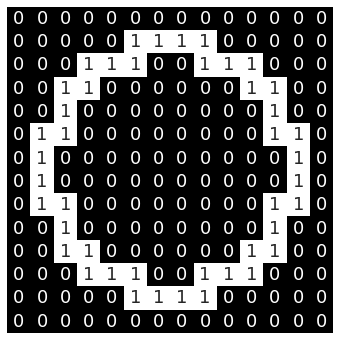

In [458]:
import seaborn as sns

def plot_heatmap(img,name):
    plt.figure(figsize=(6,6))
    ax=sns.heatmap(img,annot=True,cmap='Greys_r',cbar=False,annot_kws={"size":18})
    plt.xticks([])
    plt.yticks([])
    ax.set_aspect('equal', 'box')
    plt.savefig(name+'.png',dpi=350)
    
plot_heatmap(image_o,'o')

In [393]:
kernel_diag_fwd = np.array([
    [1, .5, 0],
    [.5, 0, -.5],
    [0, -.5, -1]
])

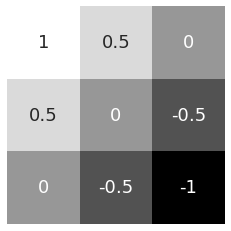

In [448]:
plot_heatmap(kernel_diag_fwd,'diag')

In [452]:
rev_diag = np.rot90(kernel_diag_fwd, k=2, axes=(0, 1))
rev_vert = np.rot90(kernel_vert, k=2, axes=(0, 1))
rev_horz = np.rot90(kernel_horz, k=2, axes=(0, 1))

In [401]:
kernel_vert = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])
kernel_horz = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
])

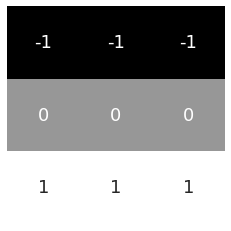

In [453]:
plot_heatmap(rev_diag,'diag_r')
plt.clf()
plot_heatmap(rev_vert,'vert_r')
plt.clf()
plot_heatmap(rev_horz,'horz_r')

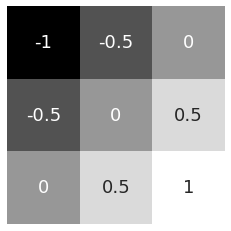

In [440]:
plot_heatmap(reversed_kernel,'rev_diag')

In [460]:
def get_conv(img,kernel):

    fm=np.zeros((12,12))

    for i in range(12):
        for j in range(12):
            fm[i,j]=np.sum(img[i:i+3,j:j+3]*kernel)
            
    return fm

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

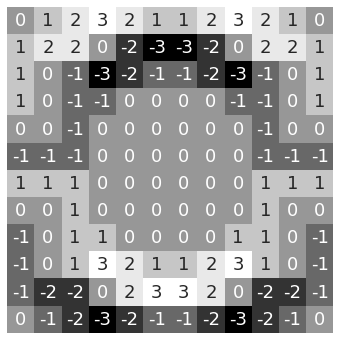

In [463]:
fm=get_conv(image_o,rev_diag)
plot_heatmap(fm,'diag_conv')
plt.clf()
fm_v=get_conv(image_o,rev_vert)
plot_heatmap(fm_v,'vert_conv')
plt.clf()
fm_h=get_conv(image_o,rev_horz)
plot_heatmap(fm_h,'vert_horz')

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

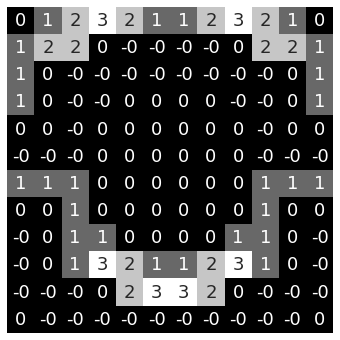

In [471]:

plot_heatmap(fm*(fm > 0),'diag_relu')
plt.clf()
plot_heatmap(fm_v*(fm_v > 0),'vert_relu')
plt.clf()
plot_heatmap(fm_h*(fm_h > 0),'horz_relu')

In [481]:
rlu=fm*(fm > 0)
rlu_v=fm_v*(fm_v>0)
rlu_h=fm_h*(fm_h>0)



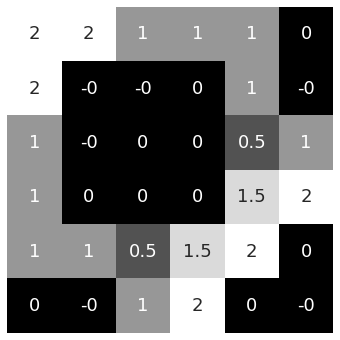

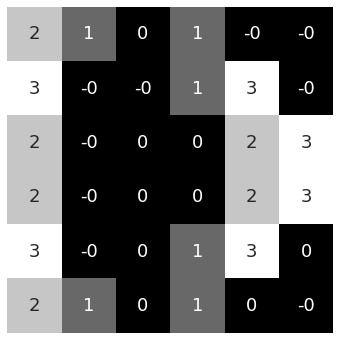

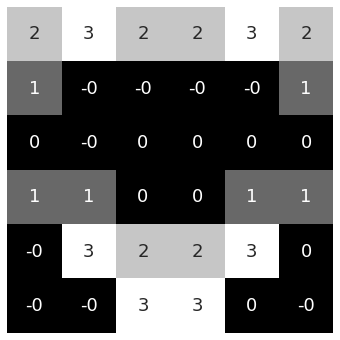

In [488]:
plot_heatmap(get_mp(rlu),'diag_mp')
plot_heatmap(get_mp(rlu_v),'v_mp')
plot_heatmap(get_mp(rlu_h),'h_mp')

In [477]:
np.array(list(range(5)))*2

array([0, 2, 4, 6, 8])

In [489]:
def get_mp(relu):

    mp=np.zeros((6,6))
    for i in range(6):
        for j in range(6):
            mp[i,j]=np.max(relu[i*2:i*2+2,j*2:j*2+2])
            
    return mp

def get_mp_6(relu):

    mp=np.zeros((4,4))
    for i in range(4):
        for j in range(4):
            mp[i,j]=np.max(relu[i*2:i*2+4,j*2:j*2+4])
            
    return mp

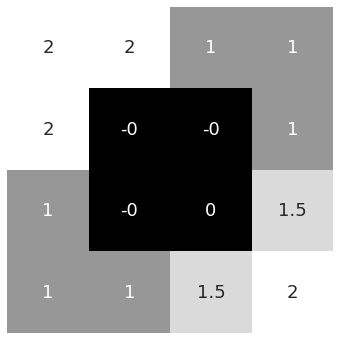

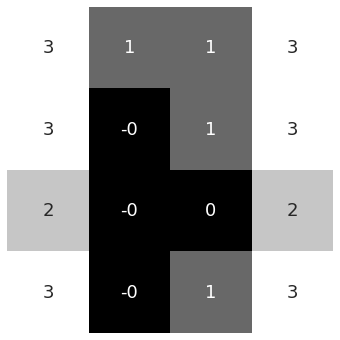

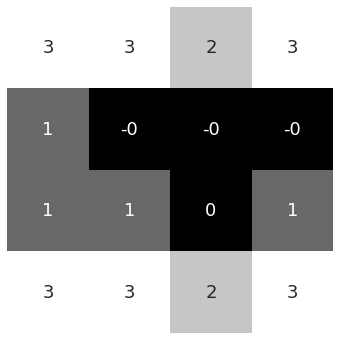

In [490]:
plot_heatmap(get_mp_6(rlu),'diag_mp')
plot_heatmap(get_mp_6(rlu_v),'v_mp')
plot_heatmap(get_mp_6(rlu_h),'h_mp')

In [510]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential

n_out=10

(x_train,y_train),(x_test,y_test)=mnist.load_data()

x_train=x_train/255.
x_test=x_test/255.

#one-hot encoding
y_train = keras.utils.np_utils.to_categorical(y_train, n_out)
y_test = keras.utils.np_utils.to_categorical(y_test, n_out)

x_train = np.expand_dims(x_train, axis=3)

#idx_train=np.random.randint(x_train.shape[0],size=n_train)
#idx_test=np.random.randint(x_test.shape[0],size=n_test)

#x_train=x_train[idx_train,:]
#y_train=y_train[idx_train]
#x_test=x_test[idx_test,:]
#y_test=y_test[idx_test]

#x_train=x_train.reshape((n_train,784))
#x_test=x_test.reshape((n_test,784))

x_train.shape,y_train.shape

((60000, 28, 28, 1), (60000, 10))

(60000, 28, 28, 1)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3915 - categorical_accuracy: 0.8855
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2247 - categorical_accuracy: 0.9332
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1929 - categorical_accuracy: 0.9434
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1721 - categorical_accuracy: 0.9493
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1575 - categorical_accuracy: 0.9527
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1430 - categorical_accuracy: 0.9572: 1s - loss: 0.1472 - categorical_accu - ETA - ETA: 0s - loss: 0.1437 - categorical_accuracy: 
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1308 - categorical_accuracy: 0.9604: 0s - loss: 0.1314 - catego
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.12

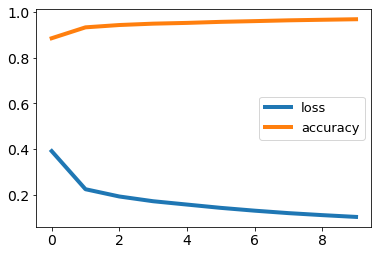

In [520]:
cnn2=models.Sequential([layers.Conv2D(filters=3,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
                        layers.MaxPooling2D((2,2)),
                        #layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                        #layers.MaxPooling2D((2,2)),
                        layers.Flatten(),
                        layers.Dense(20,activation='relu'),
                        layers.Dense(10,activation='softmax')])

cnn2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['categorical_accuracy'])


traj2=cnn2.fit(x_train,y_train,epochs=10,batch_size=32)
plt.plot(traj2.history['loss'],linewidth=4,label='loss')
plt.plot(traj2.history['categorical_accuracy'],linewidth=4,label='accuracy')
plt.legend()

https://learnopencv.com/number-of-parameters-and-tensor-sizes-in-convolutional-neural-network/

https://end-to-end-machine-learning.teachable.com/courses

https://indoml.com/2018/03/07/student-notes-convolutional-neural-networks-cnn-introduction/